<a href="https://colab.research.google.com/github/Leulassaminew/titanic-survivors-prediction/blob/main/pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
test = pd.read_csv('/content/test (1).csv')
train = pd.read_csv('/content/train (1).csv')

<ipython-input-42-ac34f31c4c98>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),cmap = "YlGnBu")


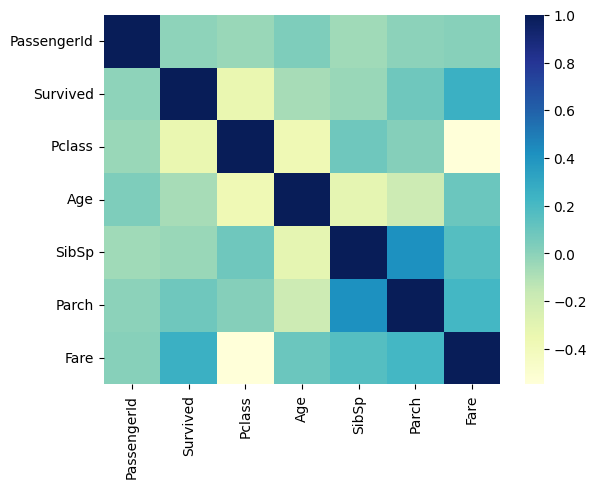

In [42]:
sns.heatmap(train.corr(),cmap = "YlGnBu")
plt.show()

In [43]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2)

for train_indicies,test_indicies in split.split(train,train[["Survived","Pclass","Sex"]]):
  strat_train_set = train.loc[train_indicies]
  strat_test_set = train.loc[test_indicies]

In [7]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
492,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.500,C30,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.550,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.800,NaN,S
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.900,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.575,NaN,S
619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.500,NaN,S
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.000,NaN,C
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.550,NaN,S


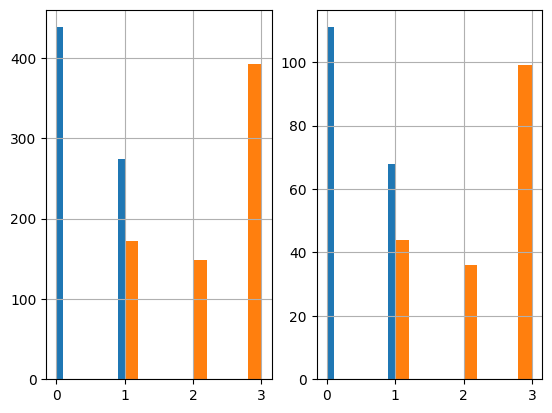

In [8]:
plt.subplot(1,2,1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()
plt.subplot(1,2,2)
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()
plt.show()

In [44]:
  strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 627 to 367
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          570 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [36]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator,TransformerMixin):
  def fit(self,x,y=None):
    return self
  def transform(self,x):
    imputer = SimpleImputer(strategy="mean")
    x['Age'] = imputer.fit_transform(x[['Age']])
    return x


In [37]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator,TransformerMixin):
  def fit(self,x,y=None):
    return self
  def transform(self,x):
    encoder = OneHotEncoder()
    matrix = encoder.fit_transform(x[['Embarked']]).toarray()
    column_names = ["C","S","Q","N"]

    for i in range (len(matrix.T)):
      x[column_names[i]]=matrix.T[i]
    matrix = encoder.fit_transform(x[['Sex']]).toarray()
    column_names = ["Female","Male"]

    for i in range (len(matrix.T)):
      x[column_names[i]]=matrix.T[i]
    return x


In [38]:
class FeatureDropper(BaseEstimator,TransformerMixin):
  def fit(self,x,y=None):
    return self
  def transform(self,x):
      return x.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis = 1,errors = "ignore")

In [39]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer",AgeImputer()),
                     ("featureencoder",FeatureEncoder()),
                     ("featuredropper",FeatureDropper())])

In [45]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [46]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
627,628,1,1,21.000000,0,0,77.9583,0.0,0.0,1.0,1.0,0.0
14,15,0,3,14.000000,0,0,7.8542,0.0,0.0,1.0,1.0,0.0
373,374,0,1,22.000000,0,0,135.6333,1.0,0.0,0.0,0.0,1.0
643,644,1,3,29.778509,0,0,56.4958,0.0,0.0,1.0,0.0,1.0
107,108,1,3,29.778509,0,0,7.7750,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,1,1,24.000000,0,0,69.3000,1.0,0.0,0.0,1.0,0.0
682,683,0,3,20.000000,0,0,9.2250,0.0,0.0,1.0,0.0,1.0
537,538,1,1,30.000000,0,0,106.4250,1.0,0.0,0.0,1.0,0.0
615,616,1,2,24.000000,1,2,65.0000,0.0,0.0,1.0,1.0,0.0


In [48]:
from sklearn.preprocessing import StandardScaler

x = strat_train_set.drop("Survived",axis = 1 )
y = strat_train_set["Survived"]

In [50]:
scaler = StandardScaler()
x_data = scaler.fit_transform(x)
y_data = y.to_numpy()

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [60]:
clf = RandomForestClassifier()
param_grid = [{"n_estimators" : [10,100,200,500],"max_depth": [None,5,10],"min_samples_split": [2,3,4]}]
grid_search = GridSearchCV(clf,param_grid, cv=3,scoring = "accuracy",return_train_score = True)
grid_search.fit(x_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [61]:
final_clf = grid_search.best_estimator_

In [62]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=3)

In [63]:
final_clf.score(x_data,y_data)

0.9452247191011236

In [78]:
test_set = pipeline.fit_transform(test)

In [81]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [80]:
test_set = test_set.fillna(method="ffill")

In [82]:
scaler = StandardScaler()
test_scale = scaler.fit_transform(test_set)

In [84]:
prediction = final_clf.predict(test_scale)

In [85]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [87]:
test["Survived"]=prediction

In [88]:
c = test[["PassengerId","Survived"]]

In [89]:
c

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [90]:
c.to_csv('fifth.csv',index = False)

In [70]:
test_set.info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
418 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [52]:
y_data

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,